In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
import tqdm


from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<h1>4. Machine Learning Models </h1>

<h2> 4.1 Reading data from file and storing into sql table </h2>

In [2]:
#Creating db file from csv
if not os.path.isfile('quora.db'):
    # U dont need to connect DB, you just create .db instance
    disk_engine = create_engine('sqlite:///quora.db')
    
    # Start time
    start = dt.datetime.now()
    
    # Declaring chunk size
    chunksize = 50000
    
    # Declare some variable for further operation
    j = 0
    index_start = 1
    
    print('For Training Data')
    # Select each rows from the final feature train data file and append on the train.db
    for df in pd.read_csv('tr_finalfeatures_tfidf_w2v.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y'], chunksize=chunksize, iterator=True, encoding='utf-8'):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('traindata', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1
    
    j = 0
    index_start = 1
    print('For Testing Data')    
    for df in pd.read_csv('ts_finalfeatures_tfidf_w2v.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y'], chunksize=chunksize, iterator=True, encoding='utf-8'):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('testdata', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1    

In [3]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

# Check to see what are the list of table present
def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables = table_names.fetchall()
    print(tables)
    return (len(tables))

In [4]:
read_db = 'quora.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the databse:
[('traindata',), ('testdata',)]


In [5]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)
        
        # Select all row from train data
        tr_data = pd.read_sql_query("SELECT * From traindata;", conn_r)
        ts_data = pd.read_sql_query("SELECT * From testdata;", conn_r)
        conn_r.commit()
        conn_r.close()

In [6]:
tr_data.head()

,index,Unnamed: 0,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,1,NaN,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
1,2,0.0,149483,0,0.4999750012499374,0.2499937501562461,0.4999750012499374,0.2499937501562461,0.3333277778703688,0.3333277778703688,...,-24.634324312210083,107.10560417175293,-13.405043482780457,89.33840942382812,-76.58213457465172,81.45504522323608,-19.589370012283325,-53.108553379774094,-42.87179920077324,50.53386044502258
2,3,1.0,146085,0,0.2499937501562461,0.12499843751953099,0.0,0.0,0.1666638889351844,0.06666622222518517,...,79.36115139722824,47.82126176357269,-7.425673961639404,66.80275255814195,-13.870270013809204,-94.35943973064423,46.116241190582514,-67.96082103252411,-47.14468511193991,-56.180332005023956
3,4,2.0,337094,1,0.6666444451851604,0.3999920001599968,0.3999920001599968,0.3333277778703688,0.49999375007812397,0.3333305555787035,...,1.1344990730285645,58.792492628097534,-44.008875012397766,28.522468209266663,21.318031311035156,-37.84933829307556,17.109098065644503,-174.242893576622,5.341458082199097,-8.428312599658966
4,5,3.0,115033,0,0.5999880002399952,0.374995312558593,0.2857102041399409,0.2222197531138543,0.4166631944733794,0.23809410431378897,...,-196.61994433403015,156.97862857580185,163.93259173631668,189.8625944852829,-93.91803228855133,-37.407774209976196,54.468217849731445,-167.02624118328094,-149.00925222039223,16.012905083596706


In [7]:
# remove the first row 
tr_data.drop(tr_data.index[0], inplace=True)
ts_data.drop(ts_data.index[0], inplace=True)
tr_y = tr_data['is_duplicate']
ts_y = ts_data['is_duplicate']
tr_data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)
ts_data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [8]:
tr_data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
1,0.4999750012499374,0.2499937501562461,0.4999750012499374,0.2499937501562461,0.3333277778703688,0.3333277778703688,0.0,1.0,0.0,6.0,...,-24.634324312210083,107.10560417175293,-13.405043482780457,89.33840942382812,-76.58213457465172,81.45504522323608,-19.589370012283325,-53.108553379774094,-42.87179920077324,50.53386044502258
2,0.2499937501562461,0.12499843751953099,0.0,0.0,0.1666638889351844,0.06666622222518517,1.0,0.0,9.0,10.5,...,79.36115139722824,47.82126176357269,-7.425673961639404,66.80275255814195,-13.870270013809204,-94.35943973064423,46.116241190582514,-67.96082103252411,-47.14468511193991,-56.180332005023956
3,0.6666444451851604,0.3999920001599968,0.3999920001599968,0.3333277778703688,0.49999375007812397,0.3333305555787035,1.0,0.0,4.0,10.0,...,1.1344990730285645,58.792492628097534,-44.008875012397766,28.522468209266663,21.318031311035156,-37.84933829307556,17.109098065644503,-174.242893576622,5.341458082199097,-8.428312599658966
4,0.5999880002399952,0.374995312558593,0.2857102041399409,0.2222197531138543,0.4166631944733794,0.23809410431378897,0.0,0.0,9.0,16.5,...,-196.61994433403015,156.97862857580185,163.93259173631668,189.8625944852829,-93.91803228855133,-37.407774209976196,54.468217849731445,-167.02624118328094,-149.00925222039223,16.012905083596706
5,0.6666444451851604,0.6666444451851604,0.6666444451851604,0.4999875003124922,0.6666555557407376,0.5714204082798817,0.0,1.0,1.0,6.5,...,4.403875708580017,102.64046776294708,23.684350728988647,62.863966047763824,-1.8335199356079102,3.9231253638863564,69.74132347106934,-117.70312696695328,-18.81660568714142,6.477832317352295


In [9]:
tr_data.shape, ts_data.shape

((70000, 218), (30000, 218))

<h2> 4.2 Converting strings to numerics </h2>

In [10]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(tr_data.columns)
for i in tqdm.tqdm_notebook(cols):
    tr_data[i] = tr_data[i].apply(pd.to_numeric)
    ts_data[i] = ts_data[i].apply(pd.to_numeric)

In [16]:
tr_y = list(map(int, tr_y.values))

In [17]:
ts_y = list(map(int, ts_y.values))

<h2> 4.3 Random train test split( 70:30) </h2>

In [18]:
# Already done before featurization

In [19]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(tr_y)
train_len = len(tr_y)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(ts_y)
test_len = len(ts_y)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6306142857142857 Class 1:  0.36938571428571426
---------- Distribution of output variable in train data ----------
Class 0:  0.3693666666666667 Class 1:  0.3693666666666667


In [7]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.8908179779765671


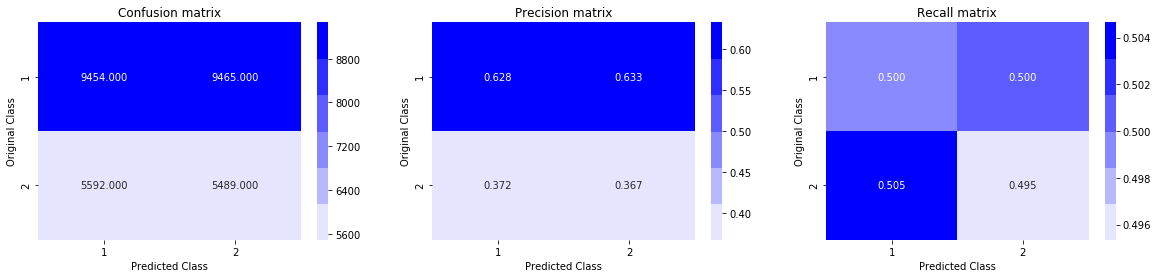

In [37]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(ts_y, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(ts_y, predicted_y)

<h2> 4.4 Logistic Regression with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.534316617702764
For values of alpha =  0.0001 The log loss is: 0.5357155624774219
For values of alpha =  0.001 The log loss is: 0.5283412033231333
For values of alpha =  0.01 The log loss is: 0.5362704213867577
For values of alpha =  0.1 The log loss is: 0.5327414541805763
For values of alpha =  1 The log loss is: 0.5251549345647659
For values of alpha =  10 The log loss is: 0.5437675168904588


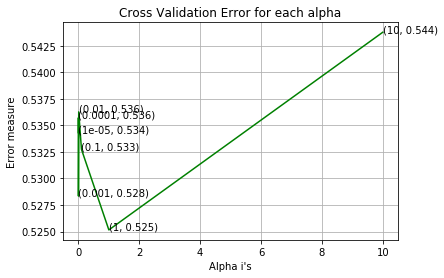

For values of best alpha =  1 The train log loss is: 0.5171011476391936
For values of best alpha =  1 The test log loss is: 0.5251549345647659
Total number of data points : 30000


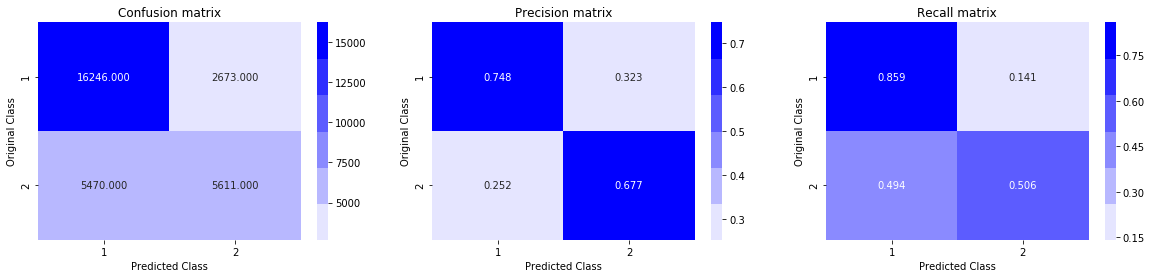

In [43]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(tr_data, tr_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(tr_data, tr_y)
    predict_y = sig_clf.predict_proba(ts_data)
    log_error_array.append(log_loss(ts_y, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(ts_y, predict_y, labels=clf.classes_, eps=1e-15))
    
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(tr_data, tr_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(tr_data, tr_y)

predict_y = sig_clf.predict_proba(tr_data)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(tr_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(ts_data)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(ts_y, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(ts_y, predicted_y)    

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.5801205922309941
For values of alpha =  0.0001 The log loss is: 0.4815117859683366
For values of alpha =  0.001 The log loss is: 0.49041655326422473
For values of alpha =  0.01 The log loss is: 0.5439436127290727
For values of alpha =  0.1 The log loss is: 0.6099396342363029
For values of alpha =  1 The log loss is: 0.6304902333258827
For values of alpha =  10 The log loss is: 0.6552730433573533


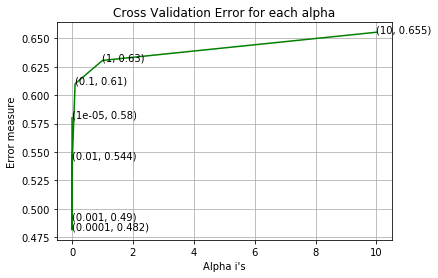

For values of best alpha =  0.0001 The train log loss is: 0.47485314502754306
For values of best alpha =  0.0001 The test log loss is: 0.4815117859683366
Total number of data points : 30000


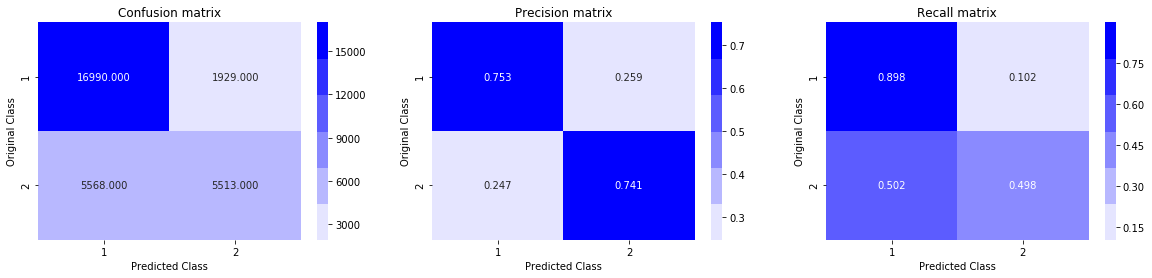

In [46]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(tr_data, tr_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(tr_data, tr_y)
    predict_y = sig_clf.predict_proba(ts_data)
    log_error_array.append(log_loss(ts_y, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(ts_y, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(tr_data, tr_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(tr_data, tr_y)

predict_y = sig_clf.predict_proba(tr_data)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(tr_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(ts_data)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(ts_y, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(ts_y, predicted_y)

<h2> 4.6 XGBoost </h2>

In [57]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02

d_train = xgb.DMatrix(tr_data, label=tr_y)
d_test = xgb.DMatrix(ts_data, label=ts_y)

watchlist = [(d_train, 'train'), (d_test, 'valid')]
bst_rcd = []

for i in [2,3,4,5]:
    for j in [2,3,5,7]:
        params['n_estimators'] = i
        params['max_depth'] = j
        bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=200)
        predict_y = bst.predict(d_test)
        print('-'*100)
        print(['n_estimator: '+str(i),'max_depth: '+str(j),log_loss(ts_y, predict_y, labels=clf.classes_, eps=1e-15)])
        print('-'*100)
        bst_rcd.append(['n_estimator: '+str(i),'max_depth: '+str(j),log_loss(ts_y, predict_y, labels=clf.classes_, eps=1e-15)])

[0]	train-logloss:0.686707	valid-logloss:0.686733
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[200]	train-logloss:0.421767	valid-logloss:0.424831
[399]	train-logloss:0.389089	valid-logloss:0.393764
----------------------------------------------------------------------------------------------------
['n_estimator: 2', 'max_depth: 2', 0.393763779057477]
----------------------------------------------------------------------------------------------------
[0]	train-logloss:0.685641	valid-logloss:0.685659
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[200]	train-logloss:0.385887	valid-logloss:0.390017
[399]	train-logloss:0.361437	valid-logloss:0.369368
----------------------------------------------------------------------------------------------------
['n_estimator: 2', 'max_depth: 3'

In [59]:
# From the above observation, we got the best params as
params['max_depth'] = 7
params['n_estimators'] = 3
bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=200)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(ts_y, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.683254	valid-logloss:0.683491
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[200]	train-logloss:0.322922	valid-logloss:0.354072
[399]	train-logloss:0.280218	valid-logloss:0.339644
The test log loss is: 0.33964437882122683


Total number of data points : 30000


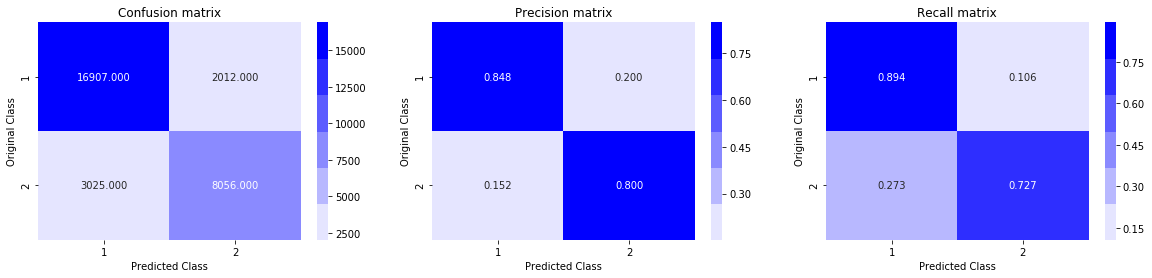

In [61]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(ts_y, predicted_y)

<h1> 5. Assignments </h1>

1. Try out models (Logistic regression, Linear-SVM) with simple TF-IDF vectors instead of TD_IDF weighted word2Vec.
2. Hyperparameter tune XgBoost using RandomSearch to reduce the log-loss.


In [ ]:
# For point 2. Xgboost hyperparameter tune done.(See above 4.6)

In [ ]:
# For point 1

In [3]:
# Read csv file
tr_data = pd.read_csv('tr_finalfeatures_tfidf.csv')
ts_data = pd.read_csv('ts_finalfeatures_tfidf.csv')
tr_data.shape, ts_data.shape

((70000, 8029), (30000, 8029))

In [4]:
tr_data.head()

,Unnamed: 0,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,...,3990_y,3991_y,3992_y,3993_y,3994_y,3995_y,3996_y,3997_y,3998_y,3999_y
0,0,149483,0,0.499975,0.249994,0.499975,0.249994,0.333328,0.333328,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,146085,0,0.249994,0.124998,0.000000,0.000000,0.166664,0.066666,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,337094,1,0.666644,0.399992,0.399992,0.333328,0.499994,0.333331,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,115033,0,0.599988,0.374995,0.285710,0.222220,0.416663,0.238094,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,190104,1,0.666644,0.666644,0.666644,0.499988,0.666656,0.571420,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# remove the first row 
tr_y = tr_data['is_duplicate']
ts_y = ts_data['is_duplicate']
tr_data.drop(['Unnamed: 0', 'id','is_duplicate'], axis=1, inplace=True)
ts_data.drop(['Unnamed: 0', 'id','is_duplicate'], axis=1, inplace=True)

In [8]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(tr_y)
train_len = len(tr_y)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(ts_y)
test_len = len(ts_y)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6306142857142857 Class 1:  0.36938571428571426
---------- Distribution of output variable in train data ----------
Class 0:  0.3693666666666667 Class 1:  0.3693666666666667


# Find the worst case log loss model

Log loss on Test Data using Random Model 0.8790757612041729


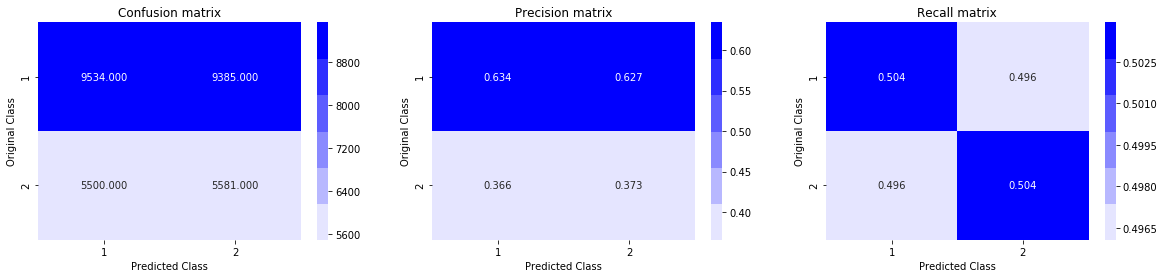

In [9]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(ts_y, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(ts_y, predicted_y)

# Logistic Regression with hyperparameter

For values of alpha =  1e-05 The log loss is: 0.46038179642619204
For values of alpha =  0.0001 The log loss is: 0.46968614036968437
For values of alpha =  0.001 The log loss is: 0.4621995568518574
For values of alpha =  0.01 The log loss is: 0.45104418169015187
For values of alpha =  0.1 The log loss is: 0.45797276242549634
For values of alpha =  1 The log loss is: 0.4905401779174919
For values of alpha =  10 The log loss is: 0.543673708352749


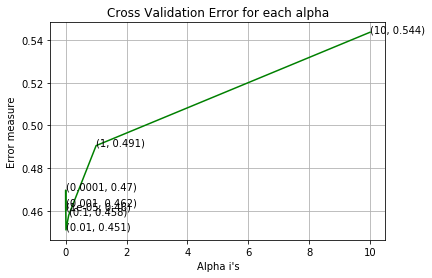

For values of best alpha =  0.01 The train log loss is: 0.44738739938564115
For values of best alpha =  0.01 The test log loss is: 0.45104418169015187
Total number of data points : 30000


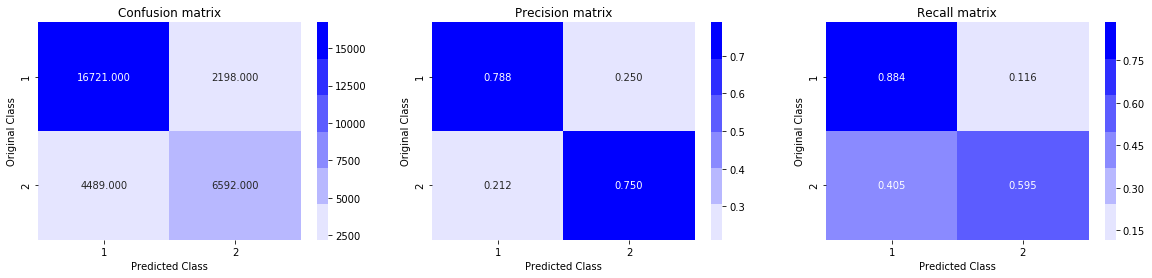

In [10]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(tr_data, tr_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(tr_data, tr_y)
    predict_y = sig_clf.predict_proba(ts_data)
    log_error_array.append(log_loss(ts_y, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(ts_y, predict_y, labels=clf.classes_, eps=1e-15))
    
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(tr_data, tr_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(tr_data, tr_y)

predict_y = sig_clf.predict_proba(tr_data)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(tr_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(ts_data)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(ts_y, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(ts_y, predicted_y)    

# Linear SVM with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.47402695719142957
For values of alpha =  0.0001 The log loss is: 0.49325105404588
For values of alpha =  0.001 The log loss is: 0.5016960533641299
For values of alpha =  0.01 The log loss is: 0.5113825679627629
For values of alpha =  0.1 The log loss is: 0.5234776884314097
For values of alpha =  1 The log loss is: 0.5689306988245295
For values of alpha =  10 The log loss is: 0.6403667508855194


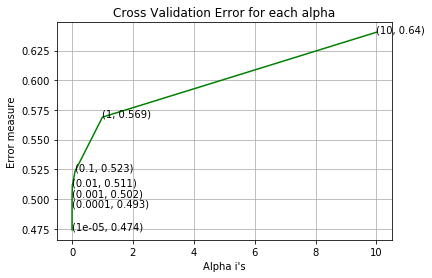

For values of best alpha =  1e-05 The train log loss is: 0.46607692386937344
For values of best alpha =  1e-05 The test log loss is: 0.47402695719142957
Total number of data points : 30000


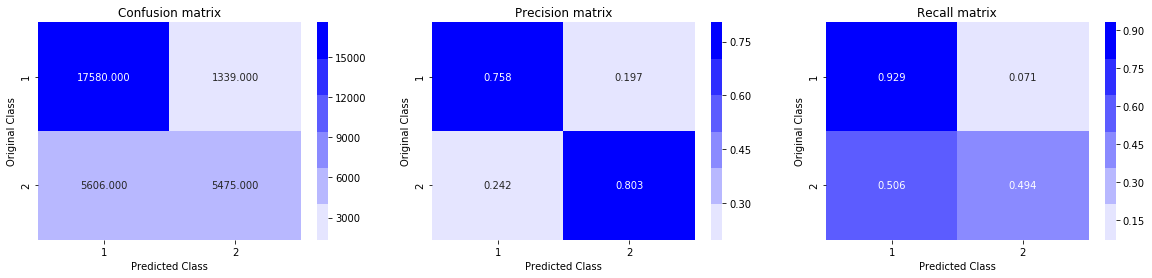

In [11]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(tr_data, tr_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(tr_data, tr_y)
    predict_y = sig_clf.predict_proba(ts_data)
    log_error_array.append(log_loss(ts_y, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(ts_y, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(tr_data, tr_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(tr_data, tr_y)

predict_y = sig_clf.predict_proba(tr_data)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(tr_y, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(ts_data)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(ts_y, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(ts_y, predicted_y)

# Experiment 1 (Basic+Advance+TFIDFW2V) Feature:
# Conclusion

1. We perform EDA:
> - Information about data
  - Find number of missing values
  - Plot distribution of data points among output classes
  - Find the number of uniqueness questions
  - plot the graph of each question with number of occurrence of that question
  - Checking duplicated question pair

2. Next, we perform basic features extraction before preprocessing:
> - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2<br>
 **<u>Total basic feature = 11</u>**
 
3. Next, we perform EDA on basic features extraction:
> - ViolinPlot and PDF of **word_share** feature
  - ViolinPlot and PDF of **word_common** feature
 
4. Next, we perform preprocessing step:
> - Removing html tags 
   - Removing Punctuations
   - Performing stemming
   - Removing Stopwords
   - Expanding contractions etc.

5. Next, we perform advance NLP features extraction:
> Definition:
    - __Token__: You get a token by splitting sentence a space
    - __Stop_Word__ : stop words as per NLTK.
    - __Word__ : A token that is not a stop_word
    
    > Features:
    - __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
    - __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
    - __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
    - __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
    - __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
    - __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))    
    - __last_word_eq__ :  Check if Last word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
    - __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
    - __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
    - __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
    - __fuzz_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
    http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    - __fuzz_partial_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
    http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    - __token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
    http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    - __token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
    http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    - __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens)) <br>
    **<u>Total advance feature = 15</u>**


6. Next, we perform EDA on advance NLP features extraction:
> - WordCloud generate from duplication and non-duplicate quora question pair.
 - Pair plot graph of features: ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio']
 - Violin plot and PDF of token_sort_ratio
 - Violin plot and PDF of fuzz_ratio
 - Visualization graph using t-SNE with both n_component=2 and n_component=3
 
7. Next, Text featurization using TFIDF-W2V:
> - Before featurization, we split the data into 70% portion of train data and 30% of test data
 - Perform TFIDF features fit and transform on train data and store all feature words with corresponding idf score into dictionary variable (dict()) which is fast indexing like a hasttable. Only Transform on test data.
 - We used GLOVE which comes from Spacy and taken all context as Wikipedia
 - Iterate each question1 ( Similarly for question2) from train data and check if its word contain in GLOVE then it will get the word vector otherwise ignore and then each word vector multiplied with tfidf score which was calculated before. then divided by summation of all tfidf score. Similarly also perform on test data also.<br>
 **<u>Total number of feature words (column)= 96 x 2(question1 and question2)</u>**
 
8. We merge all the features on train data and test data and store in two (for train and test) csv files
9. Next, we perform 3 different models with the logloss metrics: Logistic Regr, LinearSVM and XGBoost

__(Note: For EDA, we have also written with observation also)__

In [12]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Feature", "Model", "Hyperparameter", "logloss"]
x.add_row(["Basic+Advance+TFIDFW2V",'Logistic Regression','alpha =  1', 0.5251549345647659])
x.add_row(["Basic+Advance+TFIDFW2V",'LinearSVM','alpha =  0.0001', 0.4815117859683366])
x.add_row(["Basic+Advance+TFIDFW2V",'XGBoost','max_depth = 7, n_estimators = 3', 0.33964437882122683])
print(x)

+------------------------+---------------------+---------------------------------+---------------------+
|        Feature         |        Model        |          Hyperparameter         |       logloss       |
+------------------------+---------------------+---------------------------------+---------------------+
| Basic+Advance+TFIDFW2V | Logistic Regression |            alpha =  1           |  0.5251549345647659 |
| Basic+Advance+TFIDFW2V |      LinearSVM      |         alpha =  0.0001         |  0.4815117859683366 |
| Basic+Advance+TFIDFW2V |       XGBoost       | max_depth = 7, n_estimators = 3 | 0.33964437882122683 |
+------------------------+---------------------+---------------------------------+---------------------+


# Experiment 2 (Basic+Advance+TFIDF) Feature:
# Conclusion

Just the same as experiment conclusion but the only difference is: <br>
> In step 7, we only need to do TFIDF features only. We perform min_df and max_feature parameter combination as best as possible. I got getting error. So, i got with the parameter min_df=10 and max_feature=4000
**<u>Total number of feature word (column) = 4000 x 2(question1 and question2)</u>**

In [13]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Feature", "Model", "Hyperparameter", "logloss"]
x.add_row(["Basic+Advance+TFIDF",'Logistic Regression','alpha =  0.01', 0.45104418169015187])
x.add_row(["Basic+Advance+TFIDF",'LinearSVM','alpha =  1e-05', 0.47402695719142957])
# x.add_row(["Basic+Advance+TFIDFW2V",'XGBoost','max_depth = 7, n_estimators = 3', 0.33964437882122683])
print(x)

+---------------------+---------------------+----------------+---------------------+
|       Feature       |        Model        | Hyperparameter |       logloss       |
+---------------------+---------------------+----------------+---------------------+
| Basic+Advance+TFIDF | Logistic Regression | alpha =  0.01  | 0.45104418169015187 |
| Basic+Advance+TFIDF |      LinearSVM      | alpha =  1e-05 | 0.47402695719142957 |
+---------------------+---------------------+----------------+---------------------+
